<a href="https://colab.research.google.com/github/hanlululu/02807-Computational-tools-for-Data-Science/blob/main/Week4/slides_week_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <center> 02807 - Computational Tools for Data Science </center>


# <center> Week 4 <center>

# <center> Today <center>
    
* At-a-glance visualisations with the **Pandas profiler**
* **Static data visualisation** with Pandas and matplotlib
* **Interactive data visualisation** with plotly
* **Basic machine learning** with **sklearn**





# The Univeristy Ranking data



* Data from the Times Higher Education World University Ranking

* Started in the UK in 2010


* Data includes 14 features that are:
    * world_rank             
    * university_name       
    * country               
    * teaching                
    * international            
    * research                 
    * citations                
    * income                   
    * total_score              
    * num_students             
    * student_staff_ratio      
    * international_students   
    * female_male_ratio        
    * year 

In [ ]:
! pip install https://github.com/pandas-profiling/pandas-profiling/archive/master.zip

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
from pandas_profiling import ProfileReport

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
# Load data that we will use.
url = 'http://courses.compute.dtu.dk/02807/2020/lectures/week4/timesData.csv'
timesData = pd.read_csv(url)

In [ ]:
# information about timesData
timesData.info()

In [ ]:
timesData[timesData.year==2016].head(10)

# At-a-glance visualisations: the Pandas profiler

* Generally, EDA starts by df.describe(), df.info(), etc., done separately. 

* Recently, Pandas created an amazing open-source library called `pandas-profiling`.

* `pandas_profiling` offers interactive statistics with a single line of code.

In [ ]:
profile = ProfileReport(timesData, title="University Ranking dataset", html={'style': {'full_width': True}})

In [ ]:
profile.to_notebook_iframe()

* But, often you'll still need your custom visualisation.
* Let's look into some tools for that.

# Static vs dynamic visualisation

* Static: 

  * no moving parts, no operations on data. 
  * straighforward.
  * can be printed.
  * light on resources: can visualise patterns in a large dataset.

* Dynamic:

  * various operations on the data: zooming, panning, hovering over a data point, etc.
  * great for inspecting data in detail
  * resource-intensive: interactive graphics are much, much more resource-intensive than static ones.


# Static data visualisation with matplotlib (and a bit of seaborn)

## Bar charts

* Arguably, the simplest visualisation of categorical data

In [ ]:
timesData[timesData.year==2016]['country'].value_counts().head(10).plot(kind='bar', 
                                                  color=sns.color_palette(),
                                                  title='Number of universities per country (2016, 10 first countries)')

## Line charts

* Bar charts work fine for a small number of categories (like countries above)

* When we have too many values, they won't fit nicely in a bar.

* Example: number of universities per total ranking score.

In [ ]:
# Bar chart gets cluttered
timesData[timesData.year==2016]['international_students'].value_counts().plot(kind='bar', 
                                                  color=sns.color_palette(),
                                                  title='Number of universities vs % of international students (2016)')

In [ ]:
# Line chart makes more sense
timesData[timesData.year==2016]['international_students'].value_counts().plot(kind='line', 
                                                  color='red',
                                                  title='Number of universities vs % of international students (2016)')

## Scatter plots

In [ ]:
timesData[timesData.year==2016].head(20).plot(kind='scatter', x='world_rank', y='citations',
                                                  color='red',
                                                  title='Ranking vs student-staff ratio (2016)')

## Subplots

In [ ]:
import matplotlib.pyplot as plt

fig, axarr = plt.subplots(2, 1, figsize=(10, 12))

timesData[timesData.year==2016]['country'].value_counts().head(10).plot(kind='bar', 
                                                  color=sns.color_palette(),
                                                  title='Number of universities per year', 
                                                  ax=axarr[1])

timesData['year'].value_counts().head(10).plot(kind='bar', 
                                                  color=sns.color_palette(),
                                                  title='Number of universities per country (2016, 10 first countries)',
                                                  ax=axarr[0])


# Interactive data visualisation with Plotly



* Visualisations based off Kaggle notebooks. Check Kaggle out!

In [ ]:
# There's more recent versions of plotly, using this for demonstration 
!pip install plotly==3.10.0

     |████████████████████████████████| 41.5MB 103kB/s 
ERROR: cufflinks 0.17.3 has requirement plotly>=4.1.1, but you'll have plotly 3.10.0 which is incompatible.
  Found existing installation: plotly 4.4.1
    Uninstalling plotly-4.4.1:
      Successfully uninstalled plotly-4.4.1


In [ ]:
# for rendering plotly in Colab
# see https://stackoverflow.com/questions/47230817/plotly-notebook-mode-with-google-colaboratory

def configure_plotly_browser_state():
  import IPython
  display(IPython.core.display.HTML('''
        <script src="/static/components/requirejs/require.js"></script>
        <script>
          requirejs.config({
            paths: {
              base: '/static/base',
              plotly: 'https://cdn.plot.ly/plotly-latest.min.js?noext',
            },
          });
        </script>
        '''))

In [ ]:
# plotly
import plotly.plotly as py
from plotly.offline import init_notebook_mode, iplot
init_notebook_mode(connected=True)
import plotly.graph_objs as go

## Line Charts


In [ ]:
configure_plotly_browser_state() # add this line to see plotly plots in Colab

# prepare data frame
df = timesData.iloc[:100,:]

# import graph objects as "go"
import plotly.graph_objs as go

# Creating trace1
trace1 = go.Scatter(
                    x = df.world_rank,
                    y = df.citations,
                    mode = "lines",
                    name = "citations",
                    marker = dict(color = 'rgba(16, 112, 2, 0.8)'),
                    text= df.university_name)
# Creating trace2
trace2 = go.Scatter(
                    x = df.world_rank,
                    y = df.teaching,
                    mode = "lines+markers",
                    name = "teaching",
                    marker = dict(color = 'rgba(80, 26, 80, 0.8)'),
                    text= df.university_name)
data = [trace1, trace2]
layout = dict(title = 'Citation and Teaching vs World Rank of Top 100 Universities',
              xaxis= dict(title= 'World Rank',ticklen= 5,zeroline= False)
             )
fig = dict(data = data, layout = layout)
iplot(fig)

## Scatter plots


In [ ]:
configure_plotly_browser_state()

# prepare data frames
df2014 = timesData[timesData.year == 2014].iloc[:100,:]
df2015 = timesData[timesData.year == 2015].iloc[:100,:]
df2016 = timesData[timesData.year == 2016].iloc[:100,:]
# import graph objects as "go"
import plotly.graph_objs as go
# creating trace1
trace1 =go.Scatter(
                    x = df2014.world_rank,
                    y = df2014.citations,
                    mode = "markers",
                    name = "2014",
                    marker = dict(color = 'rgba(255, 128, 255, 0.8)'),
                    text= df2014.university_name)
# creating trace2
trace2 =go.Scatter(
                    x = df2015.world_rank,
                    y = df2015.citations,
                    mode = "markers",
                    name = "2015",
                    marker = dict(color = 'rgba(255, 128, 2, 0.8)'),
                    text= df2015.university_name)
# creating trace3
trace3 =go.Scatter(
                    x = df2016.world_rank,
                    y = df2016.citations,
                    mode = "markers",
                    name = "2016",
                    marker = dict(color = 'rgba(0, 255, 200, 0.8)'),
                    text= df2016.university_name)
data = [trace1, trace2, trace3]
layout = dict(title = 'Citation vs world rank of top 100 universities with 2014, 2015 and 2016 years',
              xaxis= dict(title= 'World Rank',ticklen= 5,zeroline= False),
              yaxis= dict(title= 'Citation',ticklen= 5,zeroline= False)
             )
fig = dict(data = data, layout = layout)
iplot(fig)

## Bar charts (example 1)


In [ ]:
# prepare data frames
df2014 = timesData[timesData.year == 2014].iloc[:3,:]
df2014

,world_rank,university_name,country,teaching,international,research,citations,income,total_score,num_students,student_staff_ratio,international_students,female_male_ratio,year
1002,1,California Institute of Technology,United States of America,94.4,65.8,98.2,99.8,91.2,94.9,"2,243",6.9,27%,33 : 67,2014
1003,2,Harvard University,United States of America,95.3,66.2,98.5,99.1,40.6,93.9,"20,152",8.9,25%,NaN,2014
1004,2,University of Oxford,United Kingdom,89.0,90.2,98.5,95.4,90.3,93.9,"19,919",11.6,34%,46 : 54,2014


In [ ]:
configure_plotly_browser_state()

# prepare data frames
df2014 = timesData[timesData.year == 2014].iloc[:3,:]
# import graph objects as "go"
import plotly.graph_objs as go
# create trace1 
trace1 = go.Bar(
                x = df2014.university_name,
                y = df2014.citations,
                name = "citations",
                marker = dict(color = 'rgba(50, 10, 250, 0.5)',
                             line=dict(color='rgb(0,0,0)',width=1.5)),
                text = df2014.country)
# create trace2 
trace2 = go.Bar(
                x = df2014.university_name,
                y = df2014.teaching,
                name = "teaching",
                marker = dict(color = 'rgba(25, 215, 128, 0.5)',
                              line=dict(color='rgb(0,0,0)',width=1.5)),
                text = df2014.country)
data = [trace1, trace2]

layout = {
  'xaxis': {'title': 'Top 3 universities in 2014 (citations and teaching)'},
  'barmode': 'group',
  'title': 'citations and teaching of the top 3 universities in 2014'
};
fig = go.Figure(data = data, layout = layout)
iplot(fig)

## Bar charts (example 2)

* If we change the barmode from *group* to *relative* in the previous example, we get the following. 
* The code bellow illustrates a different syntax for traces.


In [ ]:
configure_plotly_browser_state()

# prepare data frames
df2014 = timesData[timesData.year == 2014].iloc[:3,:]
# import graph objects as "go"
import plotly.graph_objs as go

x = df2014.university_name

trace1 = {
  'x': x,
  'y': df2014.citations,
  'name': 'citation',
  'type': 'bar'
}
trace2 = {
  'x': x,
  'y': df2014.teaching,
  'name': 'teaching',
  'type': 'bar'
}
data = [trace1, trace2];
layout = {
  'xaxis': {'title': 'Top 3 universities in 2014 (citations and teaching)'},
  'barmode': 'relative',
  'title': 'citations and teaching of the top 3 universities in 2014'
}
fig = go.Figure(data = data, layout = layout)
iplot(fig)

## Mixing chart types

* We can also see several charts side by side
* Example: Horizontal bar charts next to scatter plots
* Below: citation vs income for universities

In [ ]:
configure_plotly_browser_state()

# import graph objects as "go" and import tools
import plotly.graph_objs as go
from plotly import tools
import matplotlib.pyplot as plt
# prepare data frames
df2016 = timesData[timesData.year == 2016].iloc[:7,:]

y_saving = [each for each in df2016.research]
y_net_worth  = [float(each) for each in df2016.income]
x_saving = [each for each in df2016.university_name]
x_net_worth  = [each for each in df2016.university_name]
trace0 = go.Bar(
                x=y_saving,
                y=x_saving,
                marker=dict(color='rgba(171, 50, 96, 0.6)',line=dict(color='rgba(171, 50, 96, 1.0)',width=1)),
                name='research',
                orientation='h',
)
trace1 = go.Scatter(
                x=y_net_worth,
                y=x_net_worth,
                mode='lines+markers',
                line=dict(color='rgb(63, 72, 204)'),
                name='income',
)
layout = dict(
                title='Citations and income of the top 6 universities in 2016',
                yaxis=dict(showticklabels=True,domain=[0, 0.85]),
                yaxis2=dict(showline=True,showticklabels=False,linecolor='rgba(102, 102, 102, 0.8)',linewidth=2,domain=[0, 0.85]),
                xaxis=dict(zeroline=False,showline=False,showticklabels=True,showgrid=True,domain=[0, 0.42]),
                xaxis2=dict(zeroline=False,showline=False,showticklabels=True,showgrid=True,domain=[0.47, 1],side='top',dtick=25),
                legend=dict(x=0.029,y=1.038,font=dict(size=10) ),
                margin=dict(l=200, r=20,t=70,b=70),
                paper_bgcolor='rgb(248, 248, 255)',
                plot_bgcolor='rgb(248, 248, 255)',
)
annotations = []
y_s = np.round(y_saving, decimals=2)
y_nw = np.rint(y_net_worth)
# Adding labels
for ydn, yd, xd in zip(y_nw, y_s, x_saving):
    # labeling the scatter savings
    annotations.append(dict(xref='x2', yref='y2', y=xd, x=ydn - 4,text='{:,}'.format(ydn),font=dict(family='Arial', size=12,color='rgb(63, 72, 204)'),showarrow=False))
    # labeling the bar net worth
    annotations.append(dict(xref='x1', yref='y1', y=xd, x=yd + 3,text=str(yd),font=dict(family='Arial', size=12,color='rgb(171, 50, 96)'),showarrow=False))

layout['annotations'] = annotations

# Creating two subplots
fig = tools.make_subplots(rows=1, cols=2, specs=[[{}, {}]], shared_xaxes=True,
                          shared_yaxes=False, vertical_spacing=0.001)

fig.append_trace(trace0, 1, 1)
fig.append_trace(trace1, 1, 2)

fig['layout'].update(layout)
iplot(fig)

This is the format of your plot grid:
[ (1,1) x1,y1 ]  [ (1,2) x2,y2 ]



## Bubble Charts 

* Basic bubble chart: three-dimensional data. 
* Like a scatter plot, where the third dimension is given by bubble size. 
* Can more dimensions using colors, for example.

Example with 4 dimensions:
*  University world rank (first 20 of 2016) vs teaching score
*  number of students (size of bubble)
*  internationalisation score (color)


In [ ]:
configure_plotly_browser_state()

# data preparation
df2016 = timesData[timesData.year == 2016].iloc[:20,:]
num_students_size  = [float(each.replace(',', '.')) for each in df2016.num_students]
international_color = [float(each) for each in df2016.international]
data = [
    {
        'y': df2016.teaching,
        'x': df2016.world_rank,
        'mode': 'markers',
        'marker': {
            'color': international_color,
            'size': num_students_size,
            'showscale': True
        },
        "text" :  df2016.university_name
    }
]
iplot(data)

## Box Plots (example of statistical chart)

* A standardized way of displaying the distribution of data.

* The ends of the box represent the lower and upper quartiles, while the median is marked by a line inside the box. 

* Median (50th percentile) = middle value of the data set. 

* 25th percentile = quartile 1 (Q1) that is lower quartile

* 75th percentile = quartile 3 (Q3) that is higher quartile

* height of box = IQR = interquartile range = Q3-Q1

* Outliers =  more than 1.5*IQR away from median commonly.
      

In [ ]:
configure_plotly_browser_state()

# data preparation
x2015 = timesData[timesData.year == 2015]

trace0 = go.Box(
    y=x2015.total_score,
    name = 'total score of universities in 2015',
    marker = dict(
        color = 'rgb(12, 12, 140)',
    )
)
trace1 = go.Box(
    y=x2015.research,
    name = 'research of universities in 2015',
    marker = dict(
        color = 'rgb(12, 128, 128)',
    )
)
data = [trace0, trace1]
iplot(data)

## Multiple Subplots

* Useful for comparing more than one features.



In [ ]:
configure_plotly_browser_state()

trace1 = go.Scatter(
    x=x2015.world_rank,
    y=x2015.research,
    name = "research"
)
trace2 = go.Scatter(
    x=x2015.world_rank,
    y=x2015.citations,
    xaxis='x2',
    yaxis='y2',
    name = "citations"
)
trace3 = go.Scatter(
    x=x2015.world_rank,
    y=x2015.income,
    xaxis='x3',
    yaxis='y3',
    name = "income"
)
trace4 = go.Scatter(
    x=x2015.world_rank,
    y=x2015.total_score,
    xaxis='x4',
    yaxis='y4',
    name = "total_score"
)
data = [trace1, trace2, trace3, trace4]
layout = go.Layout(
    xaxis=dict(
        domain=[0, 0.45]
    ),
    yaxis=dict(
        domain=[0, 0.45]
    ),
    xaxis2=dict(
        domain=[0.55, 1]
    ),
    xaxis3=dict(
        domain=[0, 0.45],
        anchor='y3'
    ),
    xaxis4=dict(
        domain=[0.55, 1],
        anchor='y4'
    ),
    yaxis2=dict(
        domain=[0, 0.45],
        anchor='x2'
    ),
    yaxis3=dict(
        domain=[0.55, 1]
    ),
    yaxis4=dict(
        domain=[0.55, 1],
        anchor='x4'
    ),
    title = 'Research, citation, income and total score vs World Rank of Universities (2015)'
)
fig = go.Figure(data=data, layout=layout)
iplot(fig)

# Basics of machine learning with sklearn

* Machine learning is a huge field
* We'll just do a "hello world" of machine learning: a supervised learning (classification) task with `sklearn`


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error 

## Iris dataset: classify iris plants into three species

<table>
  <tr><td>
    <img src="https://www.tensorflow.org/images/iris_three_species.jpg"
         alt="Petal geometry compared for three iris species: Iris setosa, Iris virginica, and Iris versicolor">
  </td></tr>
  <tr><td align="center">
    <b>Figure 1.</b> Iris setosa, Iris versicolor, and Iris virginica </td></tr>
</table>

* Classic dataset! Can be found on the UCI Machine Learning Repository.

* It includes three iris species with 50 samples each as well as some properties about each flower.

* The species are:
  * Iris setosa
  * Iris virginica
  * Iris versicolor


* The columns in this dataset are:
  * Id
  * SepalLengthCm
  * SepalWidthCm
  * PetalLengthCm
  * PetalWidthCm
  * Species

* The goal is to predict the species based on the sepal and petal measurements.

In [ ]:
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data"
new_names = ['sepal_length','sepal_width','petal_length','petal_width','iris_class']
dataset = pd.read_csv(url, names=new_names, skiprows=0, delimiter=',')
dataset.info()

Let's have a look at the data.

In [ ]:
dataset.head(5)

In [ ]:
dataset.groupby('iris_class').count()

Let's split the data into input features ($x$) and target class ($y$). 

In [ ]:
# target labels
y = dataset['iris_class']
# input features
x = dataset.drop(['iris_class'], axis=1)

print ("dataset : ",dataset.shape)
print ("x : ",x.shape)
print ("y : ",y.shape)

## Encoding categorical variables

* We'll use a neural network to solve this classification task.

* Neural networks require all input and output variables to be numeric.

* Our targets / labels are categorical at the moment.

* We have to encode our labels into numbers before you can train our model.

* We'll use a simple **one-hot encoding**: each categorical variable will be converted into a vector consisting of 0s in all cells with the exception of a single 1. 

One-hot-encoding:

* 100: Iris setosa

* 010: Iris versicolor

* 001: Iris virginica

In [ ]:
#one hot encoding
y=pd.get_dummies(y)
y.head(100)

## Training and validation sets

Next, we generate the training and validation sets.

In [ ]:
# generate training and test sets
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.3)

# converting to float 64bit
x_train = np.array(x_train).astype(np.float64)
x_test  = np.array(x_test).astype(np.float64)
y_train = np.array(y_train).astype(np.float64)
y_test  = np.array(y_test).astype(np.float64)

# data split
print(x_train.shape, y_train.shape)
print(x_test.shape, y_test.shape)

## Define and train model

We'll use `sklearn`'s `MLPClassifier, which implements a multi-layer perceptron (MLP) network that trains using backpropagation.


In [ ]:
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.neural_network import MLPClassifier

We'll use an MLP with 3 hidden layers, each with 10 units.

In [ ]:
# model initialisation
mlp = MLPClassifier(hidden_layer_sizes=(10,10,10), max_iter=1000)

Let's train the model. In `sklearn`, the `fit function is used to train a machine learning model on the data.

In [ ]:
# train our model
mlp.fit(x_train,y_train,verbose=1)

And look at the predictions.

In [ ]:
# use our model to predict
y_pred = mlp.predict(x_test)
print('Accuracy on test set:',accuracy_score(y_pred,y_test))

* Accuracy on the test set is one way to evaluate the performance of the model.

* To evaluate a model, some commonly used metrics are the confusion matrix, precision, recall, and f1 score. 

* The `confusion_matrix` and `classification_report` methods of the `sklearn` metrics library offers these scores.

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix

print("Confusion matrix:\n", confusion_matrix(y_test.argmax(axis=1), y_pred.argmax(axis=1)))

print("\nClassification report:\n", classification_report(y_test,y_pred))

## GPU acceleration on Colab

* When training machine learning models, you can often speed-up your code with GPUs.
* Change the runtime type of your Colab notebook and you'll get connected to a GPU for free!

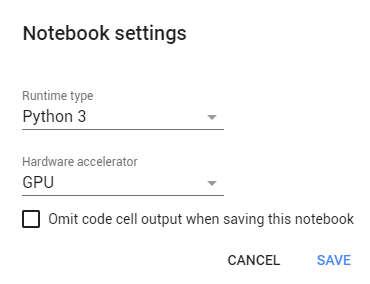

# Practical take-away

* Pandas has easy-to-use, in-built plotting functionality, based on matplotlib. Fine for static visualisation.
* For interactive visualisation, look elsewhere. Plotly is nice, but there's more: bokeh, pygal, etc.
* Interactive visualisation is often useful, but it's resource-intensive. Use accordingly.
* For at-a-glance, interactive statistics, use the Pandas profiling library.
* sklearn can be used for machine learning tasks. It offers many types of models (decision trees, nearest neighbors, neural nets) and is easy to use.
* There's much more to machine learning that we can't cover. Feel free to go down the rabbit hole! 
* Deep learning Python libraries: tensorflow, keras, pytorch, etc. For a very high-level library, there's e.g. fastai.
